In [37]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold

from sklearn.metrics import accuracy_score

In [38]:
seed = 42
np.random.seed(seed)

In [39]:
data = pd.read_csv('../datasets/in/titanic/train.csv')

In [40]:
y_raw = data['Survived']
X_raw = data.drop(['Survived'], axis=1)

In [41]:
drop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked']

In [42]:
X_raw.drop(columns=drop, inplace=True)

In [43]:
def binarize(x):
    if x == 'female':
        return 1
    else:
        return 0

In [44]:
X_raw['Sex'] = X_raw['Sex'].apply(lambda x: binarize(x))

In [45]:
# X_raw['Age_unk'] = X_raw['Age'].apply(lambda x: np.isnan(x))

In [46]:
X_raw['Age'].fillna(X_raw['Age'].median(), inplace=True)

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X, X_test, y, y_test = train_test_split(X_raw, y_raw, test_size=0.15, 
                                                    random_state=seed)

In [49]:
kf = KFold(n_splits=5, shuffle=True)

In [50]:
y.isna().sum()

0

In [32]:
# X.reset_index(inplace=True, drop=True)
# X.drop(columns=['index'], inplace=True)

In [33]:
# y = pd.DataFrame(y).reset_index(drop=True)
# y.drop(columns=['index'], inplace=True)

In [51]:
y.values

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
# X.

SyntaxError: invalid syntax (<ipython-input-36-beb934dc5809>, line 1)

In [89]:
from IPython.display import SVG
import graphviz
# from graphviz import Source
from IPython.display import display
from sklearn import tree

ModuleNotFoundError: No module named 'graphviz'

In [55]:
model = DecisionTreeClassifier(criterion='entropy', 
                               max_depth=3, min_samples_leaf=10,
                              min_samples_split=10)
model.fit(X, y)


plt.figure(figsize=(13, 5))
tree.plot_tree(model, fontsize=10, feature_names=list(X), filled=True);

AttributeError: module 'sklearn.tree' has no attribute 'plot_tree'

<Figure size 936x360 with 0 Axes>

In [ ]:
!pip install graphviz

In [74]:
result = pd.DataFrame()
for num, idxs in enumerate(kf.split(X)):
    print(f'Fold № {num}')
    train_index = idxs[0]
    val_index = idxs[1]
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    model = LogisticRegression()
    model.fit(X_train, y_train)
    dummy = {'Fold №': int(num), 'Accuracy': model.score(X_val, y_val)}
    result = result.append(dummy, ignore_index=True) 
    

Fold № 0
Fold № 1
Fold № 2
Fold № 3
Fold № 4


In [76]:
result['Fold №'] = result['Fold №'].astype(int)

In [77]:
result

,Accuracy,Fold №
0,0.802632,0
1,0.769737,1
2,0.807947,2
3,0.774834,3
4,0.827815,4


In [81]:
print(f'mean {result.Accuracy.mean()}, std {result.Accuracy.std()}')
print(f'{result.Accuracy.mean()} \u00B1 {result.Accuracy.std()}')

mean 0.7965928895085395, std 0.024160157719158838
0.7965928895085395 ± 0.024160157719158838


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.2, 
                                                    random_state=seed)

In [71]:
import warnings
warnings.filterwarnings('ignore')

In [68]:
result = pd.DataFrame()
for C_ in np.arange(.1, 10, .1):
    model = LogisticRegression(C=C_)
    model.fit(X_train, y_train)
    dummy = {'C': C_, 'Accuracy': model.score(X_test, y_test)}
    result = result.append(dummy, ignore_index=True) #работать!!


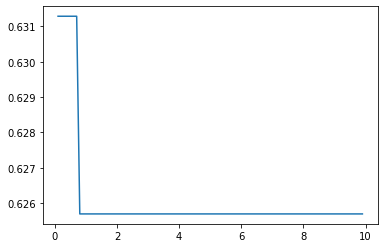

In [69]:
plt.plot(result.C, result.Accuracy)

In [56]:
result.loc[result['Accuracy'].idxmax()]

Accuracy    0.81006
C           0.80000
Name: 7, dtype: float64

In [21]:
f = pd.DataFrame()
f = f.append({'o':1}, ignore_index=True)
f = f.append({'o':2}, ignore_index=True)

In [29]:
pd.set_option('precision', 5)

In [25]:
f = f.append({'o': 1/3}, ignore_index=True)

In [30]:
f

,o
0,1.00000
1,2.00000
2,0.33333


In [10]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500


In [13]:
X_train = X_new[:int(.8*len(y))]
y_train = y[:int(.8*len(y))]

X_test = X_new[int(.8*len(y)):]
y_test = y[int(.8*len(y)):]

In [14]:
X_train.shape, y_train.shape

((712, 7), (712,))

In [15]:
X_test.shape, y_test.shape

((179, 7), (179,))

In [20]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
709,3,0,28.0,1,1,15.2458
439,2,0,31.0,0,0,10.5000
840,3,0,20.0,0,0,7.9250
720,2,1,6.0,0,1,33.0000
39,3,1,14.0,1,0,11.2417


In [37]:
# X_train.drop(columns=['Age_unk'], inplace=True)
X_none = X_new.drop(columns=['Age_unk'])

In [ ]:
str, {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'},              optional (default='liblinear').

In [44]:
model = LogisticRegression(solver='newton-cg')
model.fit(X_new, y)
print('Точность на обуч. выборке ', model.score(X_new, y))
model.fit(X_none, y)
print('Точность на обуч. выборке ', model.score(X_none, y))

Точность на обуч. выборке  0.8013468013468014
Точность на обуч. выборке  0.7957351290684624


In [ ]:
Точность на обуч. выборке  0.797752808988764
Точность на тест. выборке  0.8100558659217877

In [152]:
data_test = pd.read_csv('test.csv')

preds_data = pd.DataFrame(data_test['PassengerId'][:418])

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

X_test_kaggle = data_test[features]

X_test_kaggle['Age_unk'] = X_test_kaggle['Age'].apply(lambda x: np.isnan(x))
X_test_kaggle['Age'].fillna(X_test_kaggle['Age'].median(), inplace=True)
X_test_kaggle['Fare'].fillna(X_test_kaggle['Fare'].median(), inplace=True)
X_test_kaggle['Sex'] = X_test_kaggle['Sex'].apply(lambda x: binarize(x)) 

preds = model.predict(X_test_kaggle)

preds_data['Survived'] = preds
preds_data.to_csv('Preds.csv', index=False)

C:\Users\UserIDO\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\UserIDO\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\UserIDO\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-